# Line intersection

Solving the Classical Problem of Line intersection through 3 approaches. 

### GUI always makes it better

> **Note**: Define the testcases carefully. 


Lines do not intersect.


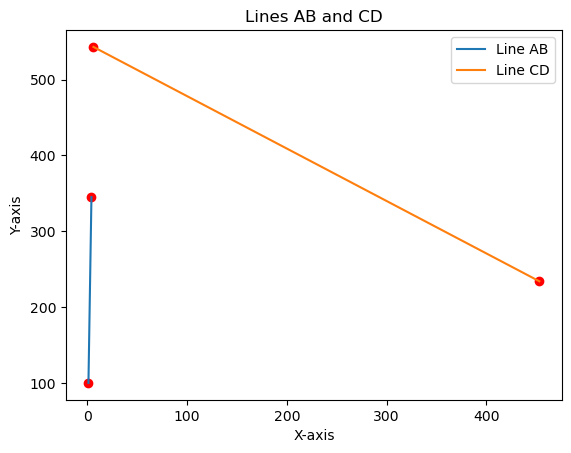

In [4]:
import matplotlib.pyplot as plt

def check_intersection(a, b, c, d):
    # Vectors representing the lines AB and CD
    vector_ab = (b[0] - a[0], b[1] - a[1])
    vector_cd = (d[0] - c[0], d[1] - c[1])

    # Cross product of vectors to check for parallel lines
    cross_product = vector_ab[0] * vector_cd[1] - vector_ab[1] * vector_cd[0]

    if cross_product == 0:
        # Lines are parallel, check for colinearity and overlap
        vector_ca = (a[0] - c[0], a[1] - c[1])
        # Check if line CD is completely on line AB
        if vector_ab[0] * vector_ca[1] - vector_ab[1] * vector_ca[0] == 0:
            return True, (c[0], c[1])  # Lines are colinear and overlap
        return False, None  # Lines are parallel and non-overlapping

    # Vector from C to A
    vector_ca = (a[0] - c[0], a[1] - c[1])

    # t and u are parameters for the lines AB and CD, respectively
    t = (vector_cd[0] * vector_ca[1] - vector_cd[1] * vector_ca[0]) / cross_product
    u = (vector_ab[0] * vector_ca[1] - vector_ab[1] * vector_ca[0]) / cross_product

    # Check if intersection point lies on both line segments
    if 0 <= t <= 1 and 0 <= u <= 1:
        x_intersection = a[0] + t * vector_ab[0]
        y_intersection = a[1] + t * vector_ab[1]
        return True, (x_intersection, y_intersection)

    return False, None

# Input four points (x, y)
a = tuple(map(float, input("Enter point A (x, y): ").split()))
b = tuple(map(float, input("Enter point B (x, y): ").split()))
c = tuple(map(float, input("Enter point C (x, y): ").split()))
d = tuple(map(float, input("Enter point D (x, y): ").split()))

# Check if lines intersect
intersect, intersection_point = check_intersection(a, b, c, d)

# Report the result
if intersect:
    print("Lines intersect.")
    print("Intersection point:", intersection_point)
else:
    print("Lines do not intersect.")

# Plotting the lines
plt.plot([a[0], b[0]], [a[1], b[1]], label='Line AB')
plt.plot([c[0], d[0]], [c[1], d[1]], label='Line CD')

# Marking the points
plt.scatter([a[0], b[0], c[0], d[0]], [a[1], b[1], c[1], d[1]], color='red')

# Adding labels and legend
plt.title('Lines AB and CD')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()

# Display the plot
plt.show()


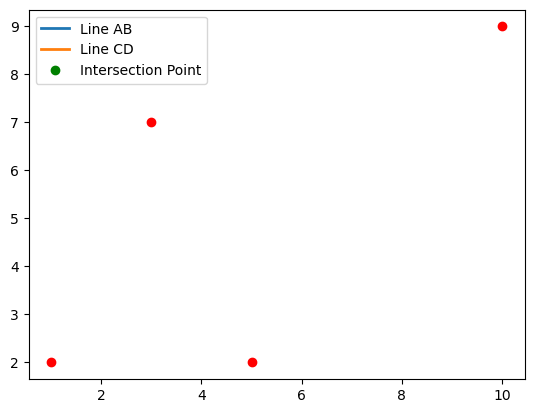

In [3]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

def parametric_equation(p, q, t):
    return (1 - t) * p[0] + t * q[0], (1 - t) * p[1] + t * q[1]

def check_intersection(a, b, c, d):
    def on_segment(p, q, r):
        return (q[0] <= max(p[0], r[0]) and q[0] >= min(p[0], r[0]) and
                q[1] <= max(p[1], r[1]) and q[1] >= min(p[1], r[1]))

    for t in [0.0, 0.25, 0.5, 0.75, 1.0]:
        intersection_point = parametric_equation(a, b, t)
        if on_segment(a, intersection_point, b) and on_segment(c, intersection_point, d):
            return True, intersection_point

    return False, None

# Input four points (x, y)
a = tuple(map(float, input("Enter point A (x, y): ").split()))
b = tuple(map(float, input("Enter point B (x, y): ").split()))
c = tuple(map(float, input("Enter point C (x, y): ").split()))
d = tuple(map(float, input("Enter point D (x, y): ").split()))

lines = [a, b, c, d]

# Plotting
fig, ax = plt.subplots()
ax.scatter(*zip(*lines), color='red')
line1, = ax.plot([], [], lw=2, label='Line AB')
line2, = ax.plot([], [], lw=2, label='Line CD')
intersection_point_marker, = ax.plot([], [], 'go', label='Intersection Point')

def init():
    line1.set_data([], [])
    line2.set_data([], [])
    intersection_point_marker.set_data([], [])
    return line1, line2, intersection_point_marker

def animate(frame):
    t = frame / 100.0
    intersection_exists, intersection_point = check_intersection(a, b, c, d)
    
    if intersection_exists:
        intersection_point_marker.set_data(*zip(intersection_point))
    
    # Parametric equations to represent lines
    x_line1, y_line1 = zip(parametric_equation(a, b, t))
    x_line2, y_line2 = zip(parametric_equation(c, d, t))

    line1.set_data(x_line1, y_line1)
    line2.set_data(x_line2, y_line2)

    return line1, line2, intersection_point_marker

ani = FuncAnimation(fig, animate, frames=100, init_func=init, blit=True)
plt.legend()
plt.show()
